# IBM Developer Skills Network

# Linear Regression Training and Validation Data

In [1]:
import torch
import matplotlib.pyplot as plt
from torch import nn, optim

# Make some Data

In [2]:
# Create Data Class

from torch.utils.data import Dataset, DataLoader

class Data(Dataset):

    # Constructor
    def __init__(self, train=True):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.f = -3*self.x + 1
        self.y = self.f + 0.1*torch.randn(self.x.size())
        self.len = self.x.shape[0]

        # outliers
        if train == True:
            self.y[0] = 0
            self.y[50:55] = 20
        else:
            pass
    
    # Getter
    def __getitem__(self, index):
        return self.x[index], self.y[index]
        
    # Get length
    def __len__(self):
        return self.len

In [3]:
# Create training dataset and validation dataset

train_data = Data()
val_data = Data(train=False)

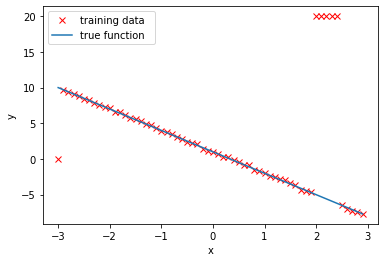

In [4]:
# Plot out training points

plt.plot(train_data.x.numpy(), train_data.y.numpy(), 'xr',label="training data ")
plt.plot(train_data.x.numpy(), train_data.f.numpy(), label="true function  ")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Create Linear regression, dataloader, criterion function

In [5]:
from torch import nn

class linear_regression(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    # Prediction function
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [6]:
# Loss function and data loader
criterion = nn.MSELoss()
trainloader = DataLoader(dataset = train_data, batch_size=1)

# Hyper parameters with learning rate

In [7]:
learning_rates = [0.0001, 0.001, 0.01, 0.1]

train_error = torch.zeros(len(learning_rates))
validation_error = torch.zeros(len(learning_rates))

MODELS = []

# Train Models with different Hyperparameters

In [9]:
def train_model_with_lr(iter, lr_list):

    for i, lr in enumerate(lr_list):
        model = linear_regression(1, 1)
        optimizer = optim.SGD(model.parameters(), lr = lr)

        for epoch in range(iter):
            for x, y in trainloader:

                yhat = model(x)
                loss = criterion(yhat, y)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
        
        # Train data
        Yhat = model(train_data.x)
        train_loss = criterion(Yhat, train_data.y)
        train_error[i] = train_loss.item()

        # Validation data
        Yhat = model(val_data.x)
        val_loss = criterion(Yhat, val_data.y)
        validation_error[i] = val_loss.item()
        MODELS.append(model)

train_model_with_lr(10, learning_rates)

# View the results

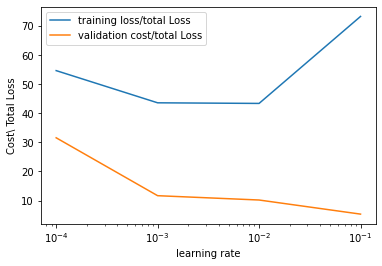

In [11]:
# Plot the training loss and validation loss
import numpy as np

plt.semilogx(np.array(learning_rates), train_error.numpy(), label = 'training loss/total Loss')
plt.semilogx(np.array(learning_rates), validation_error.numpy(), label = 'validation cost/total Loss')
plt.ylabel('Cost\ Total Loss')
plt.xlabel('learning rate')
plt.legend()
plt.show()

In [12]:
good_model = MODELS[3]
for x, y in trainloader:
    print('yhat=', good_model(x), ' y=', y)

yhat= tensor([[14.2947]], grad_fn=<AddmmBackward>)  y= tensor([[0.]])
yhat= tensor([[13.8660]], grad_fn=<AddmmBackward>)  y= tensor([[9.6404]])
yhat= tensor([[13.4373]], grad_fn=<AddmmBackward>)  y= tensor([[9.3320]])
yhat= tensor([[13.0087]], grad_fn=<AddmmBackward>)  y= tensor([[9.1062]])
yhat= tensor([[12.5800]], grad_fn=<AddmmBackward>)  y= tensor([[8.7893]])
yhat= tensor([[12.1513]], grad_fn=<AddmmBackward>)  y= tensor([[8.4663]])
yhat= tensor([[11.7226]], grad_fn=<AddmmBackward>)  y= tensor([[8.2596]])
yhat= tensor([[11.2940]], grad_fn=<AddmmBackward>)  y= tensor([[7.7933]])
yhat= tensor([[10.8653]], grad_fn=<AddmmBackward>)  y= tensor([[7.5623]])
yhat= tensor([[10.4366]], grad_fn=<AddmmBackward>)  y= tensor([[7.2417]])
yhat= tensor([[10.0079]], grad_fn=<AddmmBackward>)  y= tensor([[7.1001]])
yhat= tensor([[9.5792]], grad_fn=<AddmmBackward>)  y= tensor([[6.5732]])
yhat= tensor([[9.1506]], grad_fn=<AddmmBackward>)  y= tensor([[6.5806]])
yhat= tensor([[8.7219]], grad_fn=<AddmmBackw